In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')
df.shape

(150, 5)

In [4]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [5]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
df.species.nunique()

3

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
import numpy as np
df.describe(include=[np.number])

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.describe(include=[np.object])


/tmp/ipykernel_71438/476131807.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,species
count,150
unique,3
top,setosa
freq,50


In [11]:
df.isna().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
df = pd.DataFrame(
{"a" : [np.nan, 5, 6],
"b" : [7, np.nan, 9],
"c" : [np.nan, 11, np.nan]},
index = [1, 2, 3])

In [17]:
df

,a,b,c
1,NaN,7.0,NaN
2,5.0,NaN,11.0
3,6.0,9.0,NaN


In [18]:
df.dropna(axis=0, how='all')

,a,b,c
1,NaN,7.0,NaN
2,5.0,NaN,11.0
3,6.0,9.0,NaN


In [19]:
df.dropna(axis=0, how='any')

,a,b,c


In [20]:
df.fillna(0.0)

,a,b,c
1,0.0,7.0,0.0
2,5.0,0.0,11.0
3,6.0,9.0,0.0


In [21]:
df.fillna(value={'a':0, 'b':1, 'c':2})

,a,b,c
1,0.0,7.0,2.0
2,5.0,1.0,11.0
3,6.0,9.0,2.0


In [25]:
df = pd.DataFrame(
    {'a':range(1,11), 'b':np.random.randn(10)}
)

In [26]:
df

,a,b
0,1,-1.174756
1,2,-0.389280
2,3,-1.460641
3,4,0.376483
4,5,-0.684539
5,6,-0.614836
6,7,-2.152509
7,8,-1.222800
8,9,-0.824270
9,10,-0.221468


In [29]:
df.assign(ln_b=lambda row: np.log(row.a))

,a,b,ln_b
0,1,-1.174756,0.000000
1,2,-0.389280,0.693147
2,3,-1.460641,1.098612
3,4,0.376483,1.386294
4,5,-0.684539,1.609438
5,6,-0.614836,1.791759
6,7,-2.152509,1.945910
7,8,-1.222800,2.079442
8,9,-0.824270,2.197225
9,10,-0.221468,2.302585


In [31]:
pd.qcut(df.b, 3, labels=['bigger', 'medium', 'smaller'])

0     bigger
1    smaller
2     bigger
3    smaller
4     medium
5     medium
6     bigger
7     bigger
8     medium
9    smaller
Name: b, dtype: category
Categories (3, object): ['bigger' < 'medium' < 'smaller']

In [33]:
df.clip(lower=-0.5, upper=0.3)

,a,b
0,0.3,-0.500000
1,0.3,-0.389280
2,0.3,-0.500000
3,0.3,0.300000
4,0.3,-0.500000
5,0.3,-0.500000
6,0.3,-0.500000
7,0.3,-0.500000
8,0.3,-0.500000
9,0.3,-0.221468


In [37]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [39]:
df.rename(columns={'origin': 'k'})

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,k,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [43]:
df = pd.DataFrame(
{"a" : [4, 5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = [1, 2, 3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [52]:
df2 = pd.melt(df).assign(idx=lambda row: row.index%3)
df2

,variable,value,idx
0,a,4,0
1,a,5,1
2,a,6,2
3,b,7,0
4,b,8,1
5,b,9,2
6,c,10,0
7,c,11,1
8,c,12,2


In [53]:
df2.pivot(index='idx', columns='variable', values='value')

variable,a,b,c
idx,,,
0,4,7,10
1,5,8,11
2,6,9,12


In [58]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [61]:
df.groupby(by='origin').apply(list)

origin
europe    [mpg, cylinders, displacement, horsepower, wei...
japan     [mpg, cylinders, displacement, horsepower, wei...
usa       [mpg, cylinders, displacement, horsepower, wei...
dtype: object

In [65]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [66]:
df.shift(1).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet chevelle malibu
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,usa,buick skylark 320
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,usa,plymouth satellite
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,usa,amc rebel sst


In [68]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
s

2000-01-01    0.633958
2000-01-02   -0.637661
2000-01-03    1.004808
2000-01-04   -1.598554
2000-01-05   -0.567293
                ...   
2002-09-22    1.172464
2002-09-23   -0.109268
2002-09-24    1.409226
2002-09-25    0.349292
2002-09-26    0.232756
Freq: D, Length: 1000, dtype: float64

In [70]:
[i for i in dir(s.rolling(window=10)) if not i.startswith('_')]

['agg',
 'aggregate',
 'apply',
 'axis',
 'center',
 'closed',
 'corr',
 'count',
 'cov',
 'exclusions',
 'is_datetimelike',
 'kurt',
 'max',
 'mean',
 'median',
 'method',
 'min',
 'min_periods',
 'ndim',
 'obj',
 'on',
 'quantile',
 'rank',
 'sem',
 'skew',
 'std',
 'sum',
 'validate',
 'var',
 'win_type',
 'window']

In [71]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [79]:
df3 = df[['horsepower', 'displacement', 'acceleration']]
df3.acceleration *= 10
df3

/tmp/ipykernel_71438/99720350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.acceleration *= 10


,horsepower,displacement,acceleration
0,130.0,307.0,120.0
1,165.0,350.0,115.0
2,150.0,318.0,110.0
3,150.0,304.0,120.0
4,140.0,302.0,105.0
...,...,...,...
393,86.0,140.0,156.0
394,52.0,97.0,246.0
395,84.0,135.0,116.0
396,79.0,120.0,186.0


<AxesSubplot:>

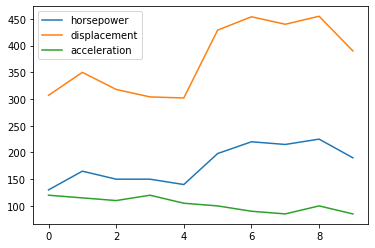

In [94]:
df3.head(10).plot()

<AxesSubplot:ylabel='Frequency'>

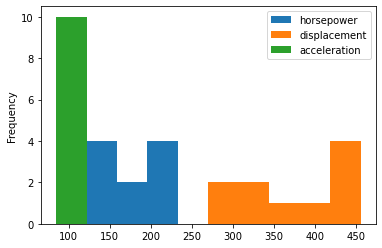

In [97]:
df3.head(10).plot.hist()

In [106]:
df4 = pd.DataFrame(df3.iloc[:, 0])
df4['horsepower_diff'] = df4.diff()
df4

,horsepower,horsepower_diff
0,130.0,NaN
1,165.0,35.0
2,150.0,-15.0
3,150.0,0.0
4,140.0,-10.0
...,...,...
393,86.0,-4.0
394,52.0,-34.0
395,84.0,32.0
396,79.0,-5.0
